In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import cv2
import time as t
from PIL import Image
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import random as rn

In [109]:
signs = ["fist", "chille", "V", "Hand"]
data_paths = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\data\ "
test_path = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\test\ "
num_images = 1000
img_size = (300,300)


In [112]:
#cv2.imshow("preview", frame) funktioniert nicht: keine rückmeldung

def picture():
    rval, frame = vc.read()
   # clear_output()
    #plt.imshow(frame)
    #plt.show()
    t.sleep(rn.random() / 100) # max 0.1 sec avg: 0.05sec 
    return(frame)


vc = cv2.VideoCapture(0)



In [113]:
for i in range(len(signs)):
    print("taking pictures of   "+str(signs[i]))
    t.sleep(2)
    for k in range(num_images):
        frame = picture()
        frame = cv2.resize(frame, img_size)
        cv2.imwrite(data_paths+ signs[i]+str(k)+'.png', frame)

print("done")
vc.release()

taking pictures of   fist
taking pictures of   chille
taking pictures of   V
taking pictures of   Hand
done


In [114]:
paths = []
for k in range(len(signs)):
    for i in range(num_images):
        paths.append(data_paths+ signs[k]+str(i)+'.png')

#create y
y = []

for k in range(len(signs)):
    for i in range(num_images):
        y.append(k)


In [115]:
#get images   uuubberprüfen
def img_gen(path, size):
    img = Image.open(path)
    #img = img.resize(size, Image.ANTIALIAS) vorher schon gmeacht
    img = np.array(img) / 255
    return img



def mapping(arr):
    map = lambda t: img_gen(t, img_size)
    res = np.array([map(i) for i in arr])
    return res



In [116]:
X = mapping(paths)
y = np.array(tf.one_hot(y, len(signs)))
print(np.shape(X))
print(np.shape(y))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(4000, 300, 300, 3)
(4000, 4)


plot some samples

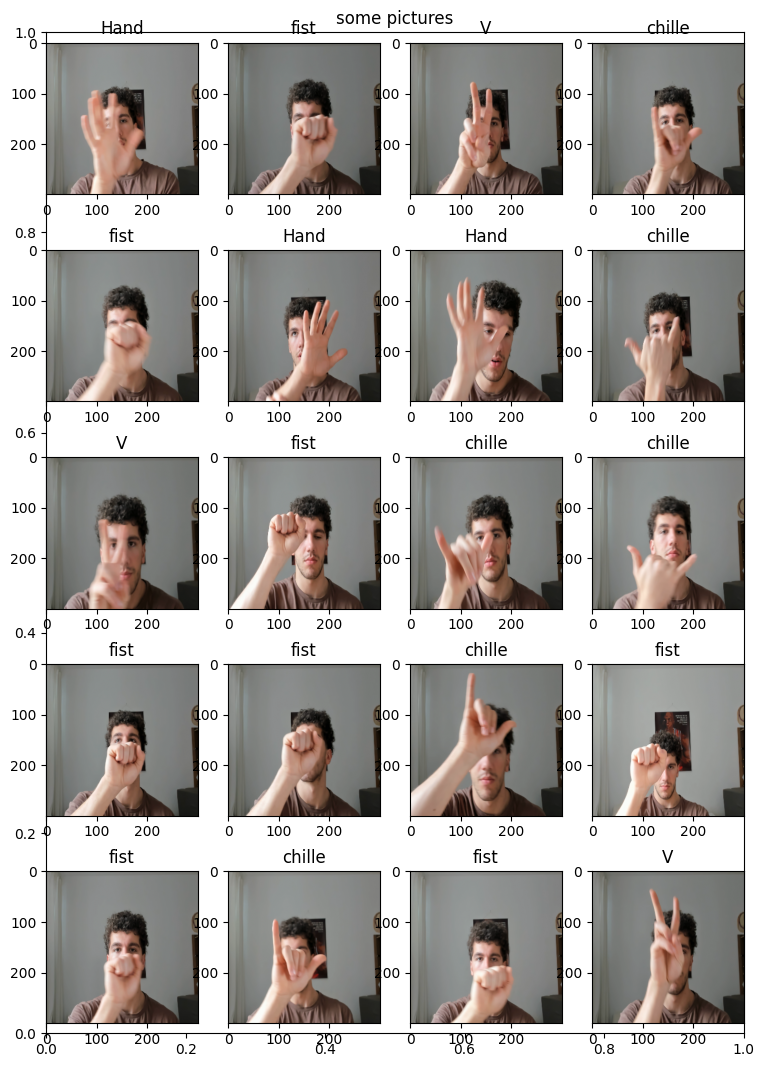

In [117]:
w, h = 10, 10 
fig = plt.figure(figsize=(9, 13))
plt.title("some pictures")
columns, rows = 4, 5




ax = []

for i in range(columns*rows):
    img = x_train[i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(str(signs[np.argmax(y_train[i])]))  
    plt.imshow(img)
 


In [118]:

s,s = img_size
shape = (s, s, 3)



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,kernel_size=(5,5), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
    tf.keras.layers.Conv2D(5,kernel_size=(4,4), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
    tf.keras.layers.Conv2D(5,kernel_size=(3,3), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.Flatten(input_shape=shape),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(signs), activation='softmax')
    ])



# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

#model.fit(x_train, y_train, epochs=15, batch_size=8)

history = model.fit(x=x_train, y=y_train,
                    epochs=15,
                    batch_size=8,
                    validation_data=(x_test, y_test)
                    )

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/15
400/400 [==============================] - 8s 17ms/step - loss: 0.3576 - accuracy: 0.6700 - val_loss: 0.2269 - val_accuracy: 0.8188
Epoch 2/15
400/400 [==============================] - 4s 11ms/step - loss: 0.1221 - accuracy: 0.9166 - val_loss: 0.0833 - val_accuracy: 0.9438
Epoch 3/15
400/400 [==============================] - 4s 11ms/step - loss: 0.0601 - accuracy: 0.9634 - val_loss: 0.0718 - val_accuracy: 0.9538
Epoch 4/15
400/400 [==============================] - 4s 11ms/step - loss: 0.0435 - accuracy: 0.9759 - val_loss: 0.1481 - val_accuracy: 0.9025
Epoch 5/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0384 - accuracy: 0.9766 - val_loss: 0.0677 - val_accuracy: 0.9638
Epoch 6/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0252 - accuracy: 0.9828 - val_loss: 0.1099 - val_accuracy: 0.9400
Epoch 7/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0250 - accuracy: 0.9841 - val_loss: 0.0859 - val_accuracy: 0.9563

In [ ]:
vc = cv2.VideoCapture(0)

In [ ]:
print("mache ein zeichen ")
t.sleep(1)
p = []
for i in range(10):
    frame = picture()
    frame = cv2.resize(frame, img_size)
    p.append(test_path+str(i))
    cv2.imwrite(test_path+str(i)+'.png', frame)
  
#vc.release()
test = np.sum(model.predict(mapping(p)))
print("du zeigst "+str(signs[np.argmax(test)]))

